# Análise Estatística do texto do Plano de Governo dos Candidatos a Presidente do Brasil nas Eleições de 2022

## Plano PL 2022

In [1]:
# Instalação de bibliotecas.
!pip install pdfplumber -q
!pip install Pillow -q
!pip install wordcloud -q
!pip install plotly -q
!pip install nltk -q

In [2]:
# Importe de bibliotecas
import os
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

import pdfplumber
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Variáveis Globais
path = "C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp"
path_docs = "C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp/planos_governo/"

path_plano_pl = path_docs+'plano_PL.pdf'

In [4]:
# Leitura do plano de governo.
print(path_plano_pl)
print()

plano_candidato = pdfplumber.open(path_plano_pl)
print("### Metadados ###")
plano_candidato.metadata

C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp/planos_governo/plano_PL.pdf

### Metadados ###


{'Producer': 'GPL Ghostscript 9.50',
 'CreationDate': "D:20220809214011-03'00'",
 'ModDate': "D:20220809214011-03'00'",
 'Creator': 'Adobe InDesign 17.3 (Macintosh)',
 'Title': 'Diretrizes de Plano de Governo_2.indd'}

In [5]:
# Verifica a quantidade de páginas.
print(f"### Quantidade de páginas ###\n{len(plano_candidato.pages)}")

### Quantidade de páginas ###
48


In [6]:
# Extraí texto da primeira página para verificação.
print(plano_candidato.pages[0].extract_text())

PELO BEM
DO BRASIL
PLANO DE
PLANO DE GOVERNO2023 - 2026 1


In [23]:
# Junta todo o conteudo das paginas.
conteudo = ''
for item in plano_candidato.pages:
  conteudo=conteudo+item.extract_text()

print(conteudo)

PELO BEM
DO BRASIL
PLANO DE
PLANO DE GOVERNO2023 - 2026 1INTRODUÇÃO............................................................................................................................................................................................................................................   3
APRESENTAÇÃO......................................................................................................................................................................................................................................  5
1. VALORES E PRINCÍPIOS CENTRAIS DO PLANO DE GOVERNO_____________________________  8
1.1 A LIBERDADE E A VIDA ..................................................................................................................................................................................................................  8
  a) Liberdade Econômica  9
  b) Liberdade Religiosa  9
  c) Liberdade de Expressão  9
  d) Liberdade para a Defesa de Dir

In [24]:
# lowercase
conteudo = conteudo.lower()
print(conteudo)

pelo bem
do brasil
plano de
plano de governo2023 - 2026 1introdução............................................................................................................................................................................................................................................   3
apresentação......................................................................................................................................................................................................................................  5
1. valores e princípios centrais do plano de governo_____________________________  8
1.1 a liberdade e a vida ..................................................................................................................................................................................................................  8
  a) liberdade econômica  9
  b) liberdade religiosa  9
  c) liberdade de expressão  9
  d) liberdade para a defesa de dir

In [25]:
# retira pontuação.
conteudo = re.sub(r'[^\w\s]', ' ', conteudo)
print(conteudo)

pelo bem
do brasil
plano de
plano de governo2023   2026 1introdução                                                                                                                                                                                                                                               3
apresentação                                                                                                                                                                                                                                        5
1  valores e princípios centrais do plano de governo_____________________________  8
1 1 a liberdade e a vida                                                                                                                                                                                                                     8
  a  liberdade econômica  9
  b  liberdade religiosa  9
  c  liberdade de expressão  9
  d  liberdade para a defesa de dir

In [26]:
# tokenize por palavras.
conteudo = re.findall(r'\w+', conteudo)
print(conteudo)

['pelo', 'bem', 'do', 'brasil', 'plano', 'de', 'plano', 'de', 'governo2023', '2026', '1introdução', '3', 'apresentação', '5', '1', 'valores', 'e', 'princípios', 'centrais', 'do', 'plano', 'de', 'governo_____________________________', '8', '1', '1', 'a', 'liberdade', 'e', 'a', 'vida', '8', 'a', 'liberdade', 'econômica', '9', 'b', 'liberdade', 'religiosa', '9', 'c', 'liberdade', 'de', 'expressão', '9', 'd', 'liberdade', 'para', 'a', 'defesa', 'de', 'direitos', '9', 'e', 'liberdade', 'para', 'o', 'uso', 'responsável', 'dos', 'recursos', 'naturais', '10', '1', '2', 'dignidade', 'para', 'os', 'menos', 'favorecidos', '10', '1', '3', 'solidariedade', 'social', 'e', 'voluntariado', '11', '1', '4', 'equilíbrio', 'socioeconômico', 'regional', '11', '2', 'fundamentação', 'estratégica', '___________________________________________________', '12', '3', 'plano', 'de', 'governo', '______________________________________________________________', '14', '3', '1', 'economia', 'tecnologia', 'e', 'inovação

In [27]:
# retirar stopwords
conteudo_limpo = []
for item in conteudo:
  if (item not in stopwords) & (len(item)>1):
    conteudo_limpo.append(item)

print(conteudo_limpo)

['bem', 'brasil', 'plano', 'plano', 'governo2023', '2026', '1introdução', 'apresentação', 'valores', 'princípios', 'centrais', 'plano', 'governo_____________________________', 'liberdade', 'vida', 'liberdade', 'econômica', 'liberdade', 'religiosa', 'liberdade', 'expressão', 'liberdade', 'defesa', 'direitos', 'liberdade', 'uso', 'responsável', 'recursos', 'naturais', '10', 'dignidade', 'menos', 'favorecidos', '10', 'solidariedade', 'social', 'voluntariado', '11', 'equilíbrio', 'socioeconômico', 'regional', '11', 'fundamentação', 'estratégica', '___________________________________________________', '12', 'plano', 'governo', '______________________________________________________________', '14', 'economia', 'tecnologia', 'inovação', '14', 'avançar', 'consolidar', 'políticas', 'geração', 'emprego', 'renda', '16', 'promover', 'crescimento', 'sustentado', 'pib', 'médio', 'longo', 'prazo', '17', 'promover', 'fortalecer', 'capacidade', 'agregação', 'valor', 'agropecuária', 'mineração', '19', '

In [28]:
# Seleciona as 30 (trinta) palavras mais utilizadas.
conteudo_limpo_count = Counter(conteudo_limpo)
palavras_30 = conteudo_limpo_count.most_common(30)

df = pd.DataFrame(palavras_30, columns=['Palavra', 'Qtd'])
df

,Palavra,Qtd
0,governo,257
1,brasil,129
2,plano,121
3,nacional,104
4,segurança,98
5,desenvolvimento,97
6,saúde,85
7,meio,85
8,ações,83
9,país,76


In [29]:
# As 30 (trinta) palavras mais utilizadas.
fig = px.bar(df, x='Palavra', y='Qtd')
fig.show()

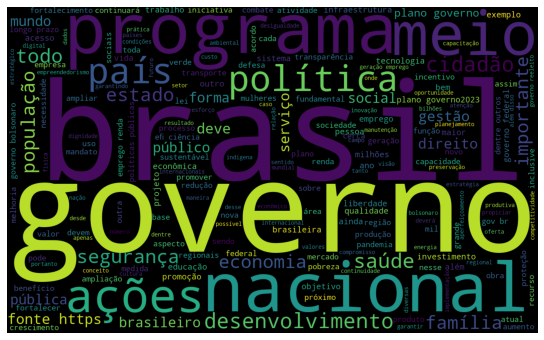

In [30]:
# concatenar as palavras
all_summary = " ".join(s for s in conteudo_limpo)

# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1300, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);